#Presentación:

¡Bienvenidos a mi presentación sobre el análisis de datos de Pokémon utilizando técnicas de Data Science! En este proyecto, he investigado y analizado datos de Pokémon de una base de datos obtenida de Kaggle en formato CSV. El objetivo principal fue descubrir patrones y relaciones interesantes dentro de los datos. A continuación, compartiré los hallazgos clave que he obtenido y las conclusiones a las que he llegado. Vamos a sumergirnos en el fascinante mundo de los Pokémon y los datos.

In [1]:
#Importación de librerías a utilizar
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
from sklearn import linear_model
from google.colab import drive
import os
#Monto al Drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [2]:
#Traigo CSV
%cd '/content/gdrive/MyDrive/Data_Sets'
df = pd.read_csv("pokemon.csv")
df.head()

/content/gdrive/MyDrive/Data_Sets


,abilities,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,...,percentage_male,pokedex_number,sp_attack,sp_defense,speed,type1,type2,weight_kg,generation,is_legendary
0,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,88.1,1,65,65,45,grass,poison,6.9,1,0
1,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,88.1,2,80,80,60,grass,poison,13.0,1,0
2,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,88.1,3,122,120,80,grass,poison,100.0,1,0
3,"['Blaze', 'Solar Power']",0.5,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,...,88.1,4,60,50,65,fire,NaN,8.5,1,0
4,"['Blaze', 'Solar Power']",0.5,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,...,88.1,5,80,65,80,fire,NaN,19.0,1,0


In [3]:
#Informaciones de la Base de Datos
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 801 entries, 0 to 800
Data columns (total 41 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   abilities          801 non-null    object 
 1   against_bug        801 non-null    float64
 2   against_dark       801 non-null    float64
 3   against_dragon     801 non-null    float64
 4   against_electric   801 non-null    float64
 5   against_fairy      801 non-null    float64
 6   against_fight      801 non-null    float64
 7   against_fire       801 non-null    float64
 8   against_flying     801 non-null    float64
 9   against_ghost      801 non-null    float64
 10  against_grass      801 non-null    float64
 11  against_ground     801 non-null    float64
 12  against_ice        801 non-null    float64
 13  against_normal     801 non-null    float64
 14  against_poison     801 non-null    float64
 15  against_psychic    801 non-null    float64
 16  against_rock       801 non

,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,against_grass,...,height_m,hp,percentage_male,pokedex_number,sp_attack,sp_defense,speed,weight_kg,generation,is_legendary
count,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,...,781.000000,801.000000,703.000000,801.000000,801.000000,801.000000,801.000000,781.000000,801.000000,801.000000
mean,0.996255,1.057116,0.968789,1.073970,1.068976,1.065543,1.135456,1.192884,0.985019,1.034020,...,1.163892,68.958801,55.155761,401.000000,71.305868,70.911361,66.334582,61.378105,3.690387,0.087391
std,0.597248,0.438142,0.353058,0.654962,0.522167,0.717251,0.691853,0.604488,0.558256,0.788896,...,1.080326,26.576015,20.261623,231.373075,32.353826,27.942501,28.907662,109.354766,1.930420,0.282583
min,0.250000,0.250000,0.000000,0.000000,0.250000,0.000000,0.250000,0.250000,0.000000,0.250000,...,0.100000,1.000000,0.000000,1.000000,10.000000,20.000000,5.000000,0.100000,1.000000,0.000000
25%,0.500000,1.000000,1.000000,0.500000,1.000000,0.500000,0.500000,1.000000,1.000000,0.500000,...,0.600000,50.000000,50.000000,201.000000,45.000000,50.000000,45.000000,9.000000,2.000000,0.000000
50%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,65.000000,50.000000,401.000000,65.000000,66.000000,65.000000,27.300000,4.000000,0.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,...,1.500000,80.000000,50.000000,601.000000,91.000000,90.000000,85.000000,64.800000,5.000000,0.000000
max,4.000000,4.000000,2.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,...,14.500000,255.000000,100.000000,801.000000,194.000000,230.000000,180.000000,999.900000,7.000000,1.000000


Ahora sí a resolver las incógnitas:

#Pregunta 1: ¿La cantidad de legendarios por generación aumenta a medida que avanzan las generaciones?

Para responder a esta pregunta, podemos creé un gráfico de barras que muestre la cantidad de Pokémon legendarios por generación. Contando la cantidad de Pokémon legendarios en cada generación:

[Text(0.5, 0, 'Generación'),
 Text(0, 0.5, 'Cantidad de Legendarios'),
 Text(0.5, 1.0, 'Cantidad de Legendarios por Generación')]

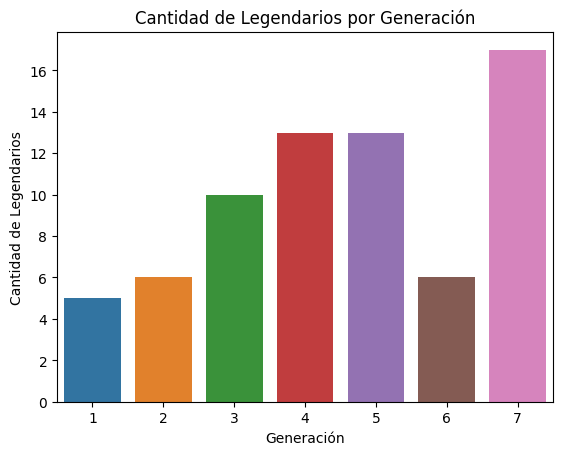

In [4]:
#Plot
ax1=sns.barplot(data=df, x="generation",y="is_legendary",estimator=sum,ci=0)
ax1.set(xlabel="Generación",ylabel="Cantidad de Legendarios",title="Cantidad de Legendarios por Generación")

#Pregunta 2: ¿Los Pokemones están igualmente distribuidos en los distintos tipos en las distintas generaciones?
Para responder a esta pregunta, creé un gráfico de torta (pie chart) que muestra la distribución de los Pokémon en los distintos tipos para cada generación. Filtramos los datos para incluir la generación y creo el gráfico:

Text(0, 0.12, 'Varianza Gen 7: 13.0')

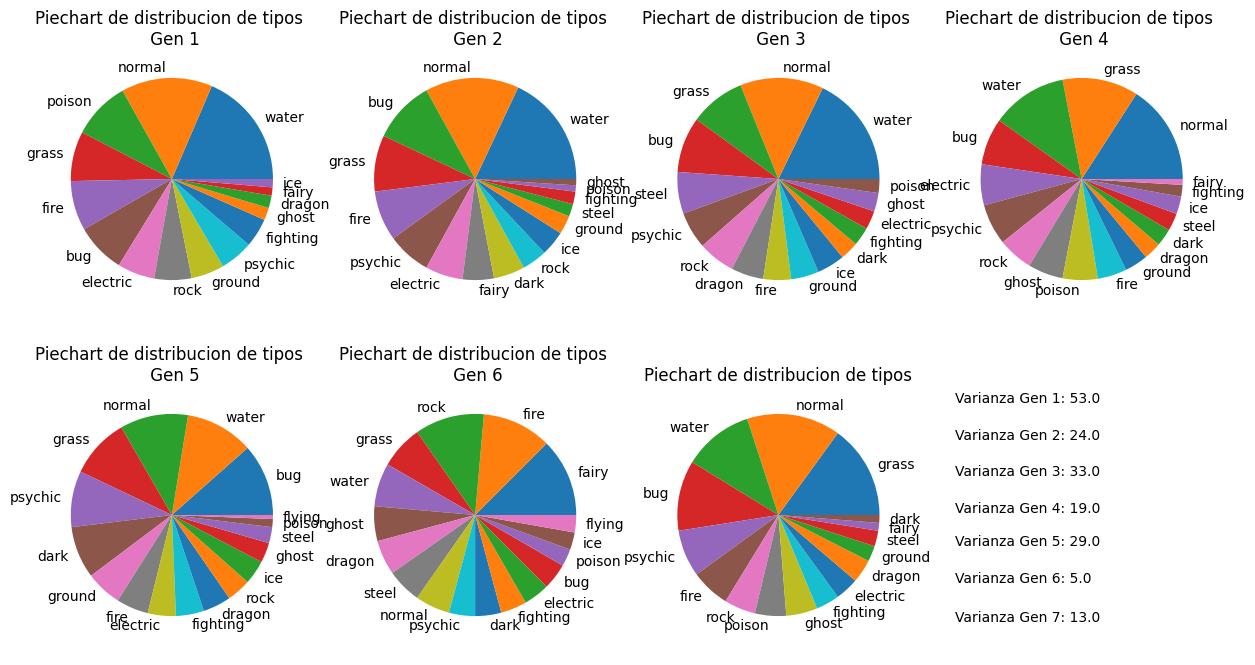

In [5]:
#Separo datos de cada generación en una nueva lista
tabla_conteo_1 = df.loc[df['generation'] == 1]['type1'].value_counts()
tabla_conteo_2 = df.loc[df['generation'] == 2]['type1'].value_counts()
tabla_conteo_3 = df.loc[df['generation'] == 3]['type1'].value_counts()
tabla_conteo_4 = df.loc[df['generation'] == 4]['type1'].value_counts()
tabla_conteo_5 = df.loc[df['generation'] == 5]['type1'].value_counts()
tabla_conteo_6 = df.loc[df['generation'] == 6]['type1'].value_counts()
tabla_conteo_7 = df.loc[df['generation'] == 7]['type1'].value_counts()

#Plots
fig,ax = plt.subplots(ncols=4,nrows=2,figsize=(15,8))
ax[0,0].pie(tabla_conteo_1, labels = tabla_conteo_1.index)
ax[0,0].set_title('Piechart de distribucion de tipos \n Gen 1')

ax[0,1].pie(tabla_conteo_2, labels = tabla_conteo_2.index)
ax[0,1].set_title('Piechart de distribucion de tipos \n Gen 2')

ax[0,2].pie(tabla_conteo_3, labels = tabla_conteo_3.index)
ax[0,2].set_title('Piechart de distribucion de tipos \n Gen 3')

ax[0,3].pie(tabla_conteo_4, labels = tabla_conteo_4.index)
ax[0,3].set_title('Piechart de distribucion de tipos \n Gen 4')

ax[1,0].pie(tabla_conteo_5, labels = tabla_conteo_5.index)
ax[1,0].set_title('Piechart de distribucion de tipos \n Gen 5')

ax[1,1].pie(tabla_conteo_6, labels = tabla_conteo_6.index)
ax[1,1].set_title('Piechart de distribucion de tipos \n Gen 6')

ax[1,2].pie(tabla_conteo_7, labels = tabla_conteo_7.index)
ax[1,2].set_title('Piechart de distribucion de tipos')

#Agrego varianzas
ax[1,3].axis("off")
ax[1,3].text(0,0.9,f'Varianza Gen 1: {tabla_conteo_1.var().round()}', color='black')
ax[1,3].text(0,0.77,f'Varianza Gen 2: {tabla_conteo_2.var().round()}', color='black')
ax[1,3].text(0,0.64,f'Varianza Gen 3: {tabla_conteo_3.var().round()}', color='black')
ax[1,3].text(0,0.51,f'Varianza Gen 4: {tabla_conteo_4.var().round()}', color='black')
ax[1,3].text(0,0.39,f'Varianza Gen 5: {tabla_conteo_5.var().round()}', color='black')
ax[1,3].text(0,0.26,f'Varianza Gen 6: {tabla_conteo_6.var().round()}', color='black')
ax[1,3].text(0,0.12,f'Varianza Gen 7: {tabla_conteo_7.var().round()}', color='black')

#Pregunta 3: ¿Hay alguna relación entre los puntos de ataque y defensa en la quinta generación?

Para responder a esta pregunta, creé un diagrama de dispersión (scatter plot) que muestra la relación entre los puntos de ataque y defensa de los Pokémon de la quinta generación. Filtramos los datos para incluir solo la quinta generación y luego trazamos el gráfico:

Text(0, 0.5, 'Defensa')

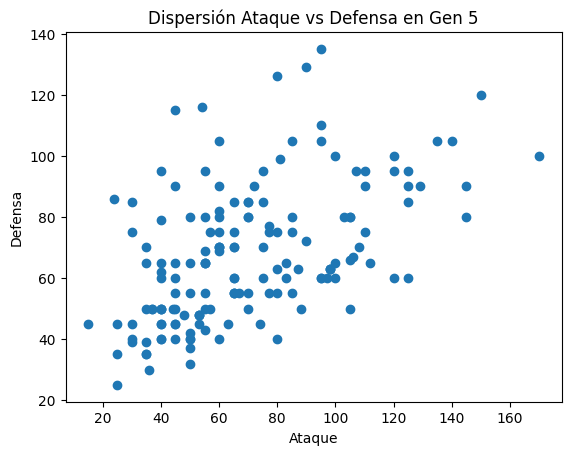

In [6]:
#Separo datos de la quinta generación en nuevo Data Frame
df_quinta_gen=df.loc[df['generation'] == 5]

#Creo Arrays de cada habilidad
at=np.array(df_quinta_gen["sp_attack"])
de=np.array(df_quinta_gen["sp_defense"])

#Plot
ax3=plt.scatter(at,de)
plt.title("Dispersión Ataque vs Defensa en Gen 5")
plt.xlabel("Ataque")
plt.ylabel("Defensa")

#Pregunta 4: ¿Cuál es la generación más fuerte en términos del promedio de ataque, defensa y velocidad?

Para responder a esta pregunta, calcularé el promedio de los puntos de ataque, defensa y velocidad, respectivamente, para cada generación y luego compararemos esos valores. Podemos utilizar un gráfico de barras para visualizar los resultados. Además marcaré las generaciones de máximo puntaje para cada uno de ellos:

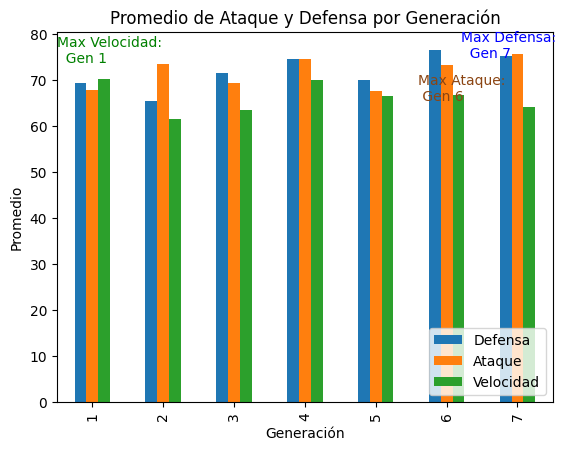

In [7]:
#Creo Data Frame con la media de cada habilidad por generación
average_stats_per_generation = df.groupby('generation')['sp_attack', 'sp_defense',"speed"].mean()


#Identifico los máximos de cada habilidad por generación
max_attack_generation = average_stats_per_generation['sp_attack'].idxmax()
max_defense_generation = average_stats_per_generation['sp_defense'].idxmax()
max_speed_generation = average_stats_per_generation['speed'].idxmax()

#Plot
average_stats_per_generation.plot(kind='bar')
plt.xlabel('Generación')
plt.ylabel('Promedio')
plt.title('Promedio de Ataque y Defensa por Generación')
plt.legend(['Defensa','Ataque', "Velocidad"],loc='lower right')

#Marco máximos
plt.text(max_attack_generation - 1.4, average_stats_per_generation.loc[max_attack_generation]['sp_attack'] - 11,
         f'Max Ataque:\n Gen {max_attack_generation}', color='saddlebrown')
plt.text(max_defense_generation - 1.8, average_stats_per_generation.loc[max_defense_generation]['sp_defense']-0.7,
         f'Max Defensa:\n  Gen {max_defense_generation}', color='blue')
plt.text(max_speed_generation-1.5, average_stats_per_generation.loc[max_speed_generation]['speed'] + 3.6,
         f'Max Velocidad: \n  Gen {max_speed_generation}', color='green')
plt.show()

#Pregunta 5: Crear un predictor para la tasa de captura
Para esta consigna utilizaré un Modelo de Regresión Multivariable y los para poder analizar los tipos me apoyaré en la función get_dummies() para castearlo a variables binomiales. 

Asumo que la Pokedex trae como información: el tipo primario, el tipo secundario, el peso, la altura, puntaje de ataque y puntaje de defensa.

In [8]:
#Creo un Data Frame tomadno los datos como vendrían en la Pokedex, casteando los tipos 1rio y 2rio a valores binomiales
data_pokedex = df[['sp_attack', 'sp_defense', 'type1', 'type2',"weight_kg","height_m","capture_rate"]]
data_pokedex= data_pokedex.fillna(0)
data_pokedex=pd.get_dummies(data_pokedex,columns=["type1","type2"])
data_pokedex.info()
data_pokedex.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 801 entries, 0 to 800
Data columns (total 42 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sp_attack       801 non-null    int64  
 1   sp_defense      801 non-null    int64  
 2   weight_kg       801 non-null    float64
 3   height_m        801 non-null    float64
 4   capture_rate    801 non-null    object 
 5   type1_bug       801 non-null    uint8  
 6   type1_dark      801 non-null    uint8  
 7   type1_dragon    801 non-null    uint8  
 8   type1_electric  801 non-null    uint8  
 9   type1_fairy     801 non-null    uint8  
 10  type1_fighting  801 non-null    uint8  
 11  type1_fire      801 non-null    uint8  
 12  type1_flying    801 non-null    uint8  
 13  type1_ghost     801 non-null    uint8  
 14  type1_grass     801 non-null    uint8  
 15  type1_ground    801 non-null    uint8  
 16  type1_ice       801 non-null    uint8  
 17  type1_normal    801 non-null    uin

,sp_attack,sp_defense,weight_kg,height_m,type1_bug,type1_dark,type1_dragon,type1_electric,type1_fairy,type1_fighting,...,type2_ghost,type2_grass,type2_ground,type2_ice,type2_normal,type2_poison,type2_psychic,type2_rock,type2_steel,type2_water
count,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,...,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000
mean,71.305868,70.911361,59.845568,1.134831,0.089888,0.036205,0.033708,0.048689,0.022472,0.034956,...,0.017478,0.024969,0.042447,0.018727,0.004994,0.042447,0.036205,0.017478,0.027466,0.021223
std,32.353826,27.942501,108.403567,1.082103,0.286199,0.186916,0.180589,0.215352,0.148305,0.183784,...,0.131126,0.156127,0.201733,0.135642,0.070534,0.201733,0.186916,0.131126,0.163538,0.144219
min,10.000000,20.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,45.000000,50.000000,8.300000,0.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,65.000000,66.000000,25.500000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,91.000000,90.000000,61.500000,1.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,194.000000,230.000000,999.900000,14.500000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [9]:
#Elimino error
fila_a_eliminar = data_pokedex.loc[data_pokedex['capture_rate'] == '30 (Meteorite)255 (Core)']
data_pokedex = data_pokedex.drop(fila_a_eliminar.index)

In [10]:
x=data_pokedex[['sp_attack', 'sp_defense', 'weight_kg', 'height_m', 'type1_bug', 'type1_dark', 'type1_dragon', 'type1_electric', 'type1_fairy', 'type1_fighting', 'type1_fire', 'type1_flying', 'type1_ghost', 'type1_grass', 'type1_ground', 'type1_ice', 'type1_normal', 'type1_poison',
 'type1_psychic', 'type1_rock', 'type1_steel', 'type1_water', 'type2_0', 'type2_bug', 'type2_dark', 'type2_dragon', 'type2_electric', 'type2_fairy', 'type2_fighting', 'type2_fire', 'type2_flying', 'type2_ghost', 'type2_grass', 'type2_ground', 'type2_ice',
 'type2_normal', 'type2_poison', 'type2_psychic', 'type2_rock', 'type2_steel', 'type2_water']]
y=data_pokedex['capture_rate']
regr = linear_model.LinearRegression()
regr.fit(x, y)

LinearRegression()

In [11]:
sp_attack_input = float(input("ataque: "))
sp_defense_input	= float(input("defensa: "))
weight_kg_input = float(input("peso: "))
height_m_input	= float(input("altura: "))
type1_bug_input = float(input('type1_bug (0/1): '))
type1_dark_input = float(input('type1_dark (0/1): '))
type1_dragon_input = float(input('type1_dragon (0/1): '))
type1_electric_input = float(input('type1_electric (0/1): '))
type1_fairy_input = float(input('type1_fairy (0/1): '))
type1_fighting_input = float(input('type1_fighting (0/1): '))
type1_fire_input = float(input('type1_fire (0/1): '))
type1_flying_input = float(input('type1_flying (0/1): '))
type1_ghost_input = float(input('type1_ghost (0/1): '))
type1_grass_input = float(input('type1_grass (0/1): '))
type1_ground_input = float(input('type1_ground (0/1): '))
type1_ice_input = float(input('type1_ice (0/1): '))
type1_normal_input = float(input('type1_normal (0/1): '))
type1_poison_input = float(input('type1_poison (0/1): '))
type1_psychic_input = float(input('type1_psychic (0/1): '))
type1_rock_input = float(input('type1_rock (0/1): '))
type1_steel_input = float(input('type1_steel (0/1): '))
type1_water_input = float(input('type1_water (0/1): '))
type2_0_input = float(input('type2_0 (0/1): '))
type2_bug_input = float(input('type2_bug (0/1): '))
type2_dark_input = float(input('type2_dark (0/1): '))
type2_dragon_input = float(input('type2_dragon (0/1): '))
type2_electric_input = float(input('type2_electric (0/1): '))
type2_fairy_input = float(input('type2_fairy (0/1): '))
type2_fighting_input = float(input('type2_fighting (0/1): '))
type2_fire_input = float(input('type2_fire (0/1): '))
type2_flying_input = float(input('type2_flying (0/1): '))
type2_ghost_input = float(input('type2_ghost (0/1): '))
type2_grass_input = float(input('type2_grass (0/1): '))
type2_ground_input = float(input('type2_ground (0/1): '))
type2_ice_input = float(input('type2_ice (0/1): '))
type2_normal_input = float(input('type2_normal (0/1): '))
type2_poison_input = float(input('type2_poison (0/1): '))
type2_psychic_input = float(input('type2_psychic (0/1): '))
type2_rock_input = float(input('type2_rock (0/1): '))
type2_steel_input = float(input('type2_steel (0/1): '))
type2_water_input = float(input('type2_water (0/1): '))
array=([sp_attack_input,sp_defense_input,weight_kg_input,height_m_input,type1_bug_input,type1_dark_input,type1_dragon_input,type1_electric_input,type1_fairy_input,type1_fighting_input,type1_fire_input,
        type1_flying_input,type1_ghost_input,type1_grass_input,type1_ground_input,type1_ice_input,type1_normal_input,type1_poison_input,type1_psychic_input,type1_rock_input,type1_steel_input,
       type1_water_input,type2_0_input,type2_bug_input,type2_dark_input,type2_dragon_input,type2_electric_input,type2_fairy_input,type2_fighting_input,type2_fire_input,type2_flying_input,
       type2_ghost_input,type2_grass_input,type2_ground_input,type2_ice_input,type2_normal_input,type2_poison_input, type2_psychic_input,type2_rock_input,type2_steel_input,type2_water_input])
array=np.array(array)
array=array.reshape(1, -1)
prediccion= regr.predict(array)
print("Predicción de tasa de captura: ",prediccion[0])

ataque: 100
defensa: 80
peso: 100
altura: 2
type1_bug (0/1): 0
type1_dark (0/1): 1
type1_dragon (0/1): 0
type1_electric (0/1): 0
type1_fairy (0/1): 0
type1_fighting (0/1): 0
type1_fire (0/1): 0
type1_flying (0/1): 0
type1_ghost (0/1): 0
type1_grass (0/1): 0
type1_ground (0/1): 0
type1_ice (0/1): 0
type1_normal (0/1): 0
type1_poison (0/1): 0
type1_psychic (0/1): 0
type1_rock (0/1): 0
type1_steel (0/1): 0
type1_water (0/1): 0
type2_0 (0/1): 0
type2_bug (0/1): 0
type2_dark (0/1): 0
type2_dragon (0/1): 0
type2_electric (0/1): 1
type2_fairy (0/1): 0
type2_fighting (0/1): 0
type2_fire (0/1): 0
type2_flying (0/1): 0
type2_ghost (0/1): 0
type2_grass (0/1): 0
type2_ground (0/1): 0
type2_ice (0/1): 0
type2_normal (0/1): 0
type2_poison (0/1): 0
type2_psychic (0/1): 0
type2_rock (0/1): 0
type2_steel (0/1): 0
type2_water (0/1): 0
Predicción de tasa de captura:  62.03184100979445


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


#Conclusiones:

En conclusión, basado en el análisis de los datos de Pokémon, se pueden destacar los siguientes puntos clave:

La cantidad de Pokémon legendarios aumenta a medida que avanzan las generaciones, exceptuando por la sexta generación, se observa una tendencia de incremento en cada generación.

Generalmente, los Pokemones están distribuidos en proporciones similares, salvo por el caso de la sexta y la primera generación.

En la quinta generación de Pokémon, se encontró una leve correlación entre los puntos de ataque y defensa. Los puntos de ataque y defensa no parecen ser características independientes, por lo menos en esta generación.

Al analizar el promedio de puntos de ataque, defensa y velocidad por generación, se determinó que la generación más fuerte, en términos de promedio de velocidad, es la 1era generación, ataque, 6ta y defensa 7ma. Estas generaciones en particular mostraron los valores más altos de promedio para cada habilidad.

Estos hallazgos nos proporcionan una visión interesante y valiosa sobre los Pokémon y su evolución a lo largo de las diferentes generaciones. El análisis de datos y las técnicas de Data Science aplicadas nos han permitido obtener información clave y profundizar en la comprensión de este popular universo.



#Otros puntos relevantes:

Los datos provienen de https://www.kaggle.com/datasets/rounakbanik/pokemon, la cual tiene información sobre más de 800 Pokemones de las 7 generaciones. La cual, a su vez, fue obtenida a partir de un Web Scraping de http://serebii.net/. Fueron traídos en formato CSV. 

He trabajado con las bibliotecas: Pandas, para poder trabajar cómodamente en Data Frames y poder importar el archivo; google.colab, para importarlo desde un Drive; Matplotlib y Seaborn, para la visualización de gráficos; Numpy, para la creación de arrays y Sklearn.linear_model para la creación del predictor.

Un detalle a remarcar sobre los datos obtenidos sería la diferencia entre la sexta generación y el resto, según investigué, es de las generaciones menos aceptadas por la crítica. Dejo un link a un video de YouTube donde se la coloca en último lugar del top de generaciones. https://www.youtube.com/watch?v=aTZss249oJc&ab_channel=3DJuegos 

Luego de finalizar el proyecto, noté que existe una octava generación cuyos datos no están cargados al Data Set, de todas formas no quita validez al trabajo.